<a href="https://colab.research.google.com/github/ChKoushik2004/ML-task-2-prodigyInfotech/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Scale 'Age' and 'Spending Score (1-100)' columns
scaler = MinMaxScaler()
df[['Age', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Spending Score (1-100)']])

In [4]:
# SSE using the Elbow method with original features
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

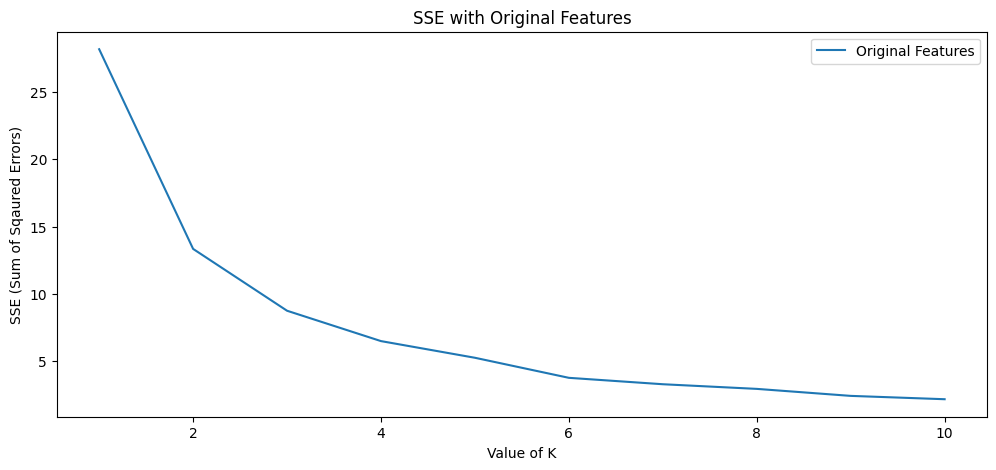

In [5]:
# Plot SSE for original features
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), sse, label='Original Features')
plt.title('SSE with Original Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.legend()
plt.show()

In [6]:
# Perform K-Means clustering with K=4
km = KMeans(n_clusters=4, n_init='auto')
df['cluster'] = km.fit_predict(df[['Age', 'Spending Score (1-100)']])


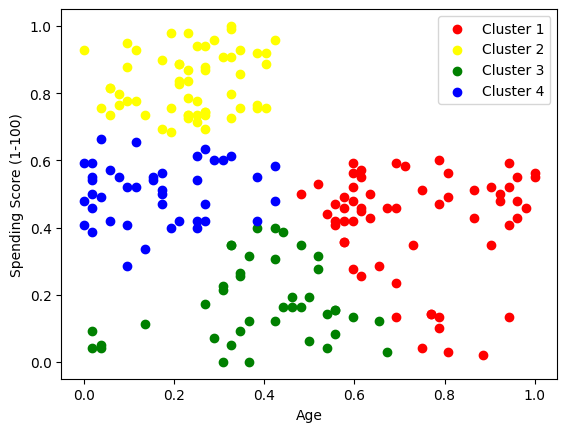

In [7]:
# Plot clustering result
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]

plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color='yellow', label='Cluster 2')
plt.scatter(df3['Age'], df3['Spending Score (1-100)'], color='green', label='Cluster 3')
plt.scatter(df4['Age'], df4['Spending Score (1-100)'], color='blue', label='Cluster 4')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
# Feature Engineering - Adding new features
df['Age_Score'] = df['Age'] * df['Spending Score (1-100)']
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df['Spending_Score_Category'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])

In [9]:
# Scale new features
df[['Age_Score']] = scaler.fit_transform(df[['Age_Score']])

In [10]:
# SSE using new features
sse_new = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score']])
    sse_new.append(km.inertia_)

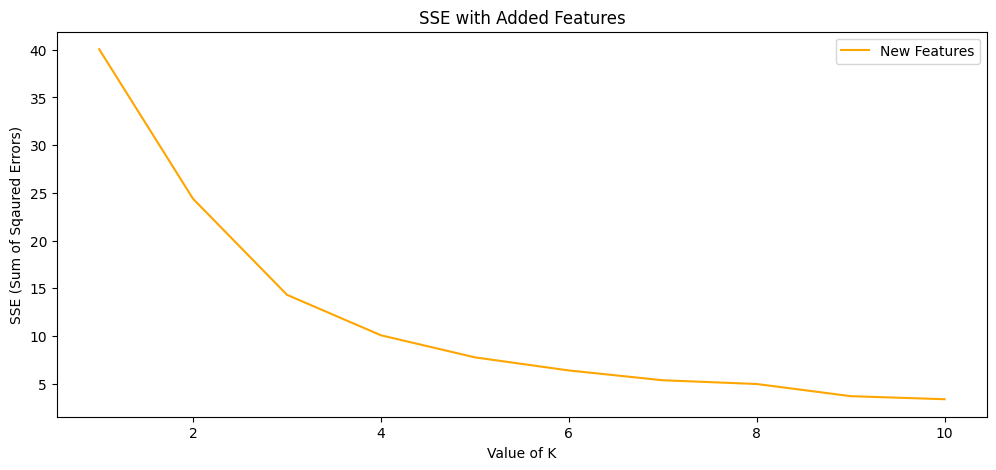

In [11]:
# Plot SSE with new features
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), sse_new, color='orange', label='New Features')
plt.title('SSE with Added Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.legend()
plt.show()

In [12]:
# More Advanced Feature Engineering
df['Income'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']
df['Age_Income_Ratio'] = df['Age'] / df['Annual Income (k$)']
df['Age_Squared'] = df['Age'] ** 2
df['Spending_Score_Squared'] = df['Spending Score (1-100)'] ** 2
df['Age_Log'] = df['Age'].apply(lambda x: 0 if x == 0 else math.log(x))

In [13]:
# Scale advanced features
df[['Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']] = scaler.fit_transform(
    df[['Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']])

In [14]:
# SSE using advanced features
sse_advanced = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score', 'Income', 'Age_Income_Ratio', 'Age_Squared',
               'Spending_Score_Squared', 'Age_Log']])
    sse_advanced.append(km.inertia_)


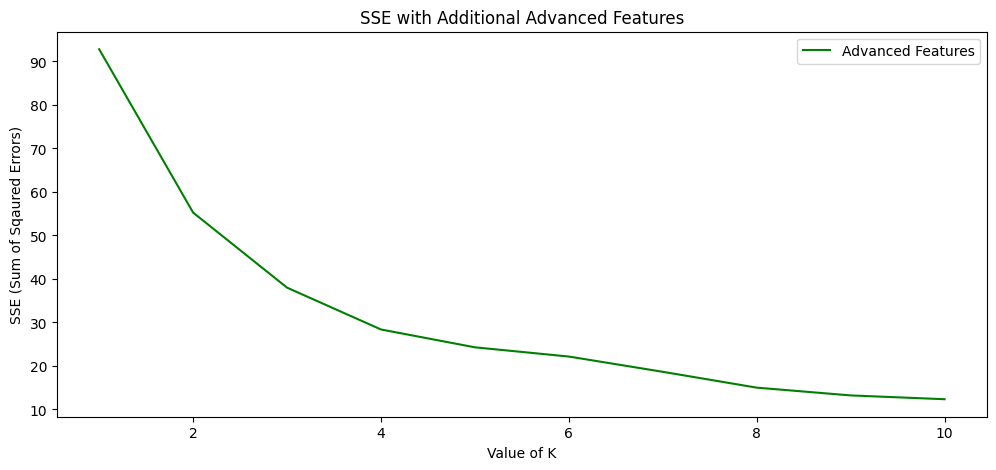

In [15]:
# Plot SSE with advanced features
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), sse_advanced, color='green', label='Advanced Features')
plt.title('SSE with Additional Advanced Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.legend()
plt.show()


In [16]:
# Adding combination and distance-based features
df['Distance_From_Center'] = np.sqrt(
    (df['Age'] - km.cluster_centers_[df['cluster'], 0]) ** 2 +
    (df['Spending Score (1-100)'] - km.cluster_centers_[df['cluster'], 1]) ** 2)

In [17]:
# Scale combination and distance-based features
df[['Distance_From_Center']] = scaler.fit_transform(df[['Distance_From_Center']])

In [18]:
# SSE using innovative features
sse_innovative = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score', 'Distance_From_Center']])
    sse_innovative.append(km.inertia_)

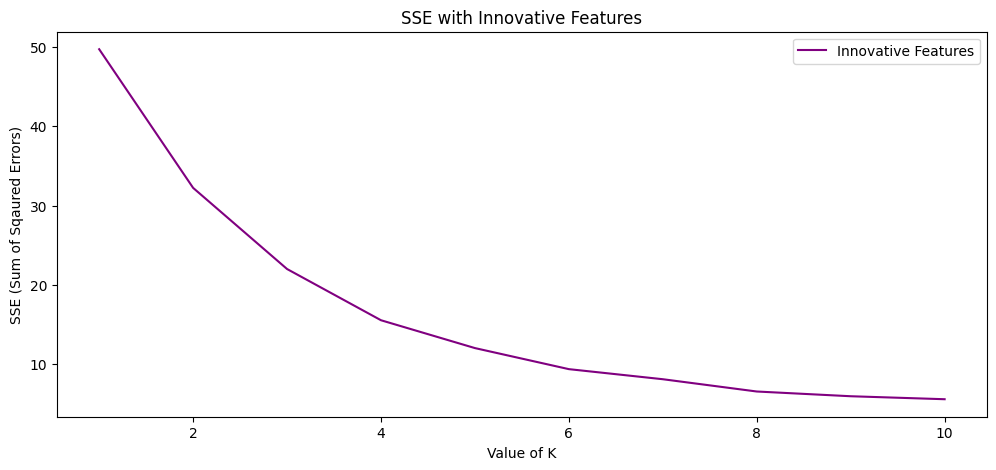

In [19]:
# Plot SSE with innovative features
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), sse_innovative, color='purple', label='Innovative Features')
plt.title('SSE with Innovative Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.legend()
plt.show()